### Dataset 基本概念

- 作用：数据加载的标准接口
- 核心方法
    -  __len__(): 返回数据集大小
    - __getitem__(): 获取单个数据样本

### 内置 Dataset 类型 (Prebuilt Dataset)
```text
│   ├── TensorDataset: 封装张量数据  
│   ├── 领域专用:  
│   │   ├── VisionDataset (CV)  
│   │   ├── AudioDataset  
│   │   ├── TextDataset (NLP)  
```

In [ ]:
from torchvision import datasets
mnist = datasets.MNIST(root='./data', train=True, download=True)

### 自定义Dataset
```text
│   ├── 实现步骤:
│   │   1. 继承 torch.utils.data.Dataset
│   │   2. 实现 __init__, __len__, __getitem__
│   ├── 典型场景:
│   │   ├── 非标准数据格式
│   │   ├── 需要复杂预处理
│   │   ├── 动态生成数据
```

In [ ]:
import torch
from torch.utils.data import Dataset

class SimpleDataset(Dataset):
    def __init__(self):
        self.x = torch.arange(0, 100).float().view(-1, 1)  # 100 个样本，每个一个特征
        self.y = self.x * 2 + 1                             # 简单的线性关系

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


### 数据增强 (Data Augmentation)
```text
│   ├── 视觉常用:
│   │   ├── torchvision.transforms
│   │   ├── RandomCrop, RandomHorizontalFlip 等
│   ├── 自定义变换:
│   │   ├── 通过 __getitem__ 实现
│   │   ├── 使用 Lambda 变换
```

#### 数据预处理

In [ ]:
# 自定义数据预处理
class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

transform = add_mult(addx=5, muly=10)
sample = (3, 2)  # x=3, y=2

print(transform(sample))  # 输出：(8, 20)


In [ ]:
class MyDataset(Dataset):
    def __init__(self, transform=None):
        self.x_data = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
        self.y_data = torch.tensor([10, 20, 30, 40, 50], dtype=torch.float32)
        self.transform = transform

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        sample = (self.x_data[idx], self.y_data[idx])
        if self.transform:
            sample = self.transform(sample)
        return sample
## 应用数据处理 到Dataset
dataset = MyDataset(transform=add_mult(addx=3, muly=10))

#### Transform Compose

In [17]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class Mult(object):
    def __init__(self, mult=1):
        self.mult = mult

    def __call__(self, img_tensor):
        return img_tensor * self.mult

transform = transforms.Compose([
    transforms.CenterCrop(20), #从正中裁剪出20*20的像素(原图28*28)
    transforms.ToTensor(),  # 转为张量
    transforms.Normalize((0.5,), (0.5,)), # 均值标准化，
    Mult() #自定义的transform数据转换器，数值*1，没有发生任何改变
])

# 加载 MNIST 数据集
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 将整个 mnist 数据集打乱顺序，并按每批 32 个样本的方式进行分批加载，用于训练模型。
loader = DataLoader(mnist, batch_size=32, shuffle=True)

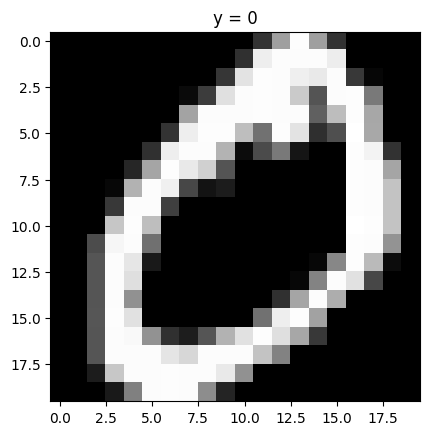

In [18]:
import matplotlib.pylab as plt

def show_data(data_sample):
    # 自动处理尺寸
    plt.imshow(data_sample[0].squeeze(0).numpy(), cmap='gray')  
    plt.title('y = ' + str(data_sample[1]))
show_data(mnist[1])

### 迭代数据集  
```text
│   ├── 直接迭代:
│   │   ├── for i in range(len(dataset)):
│   │   ├── dataset[i]
│   ├── 通过 DataLoader (推荐):
│   │   ├── 自动批处理
│   │   ├── 支持多进程加载
│   │   ├── 随机打乱
```

### 高效实践
```text
│   ├── 内存映射:
│   │   ├── 处理大文件 (如大型数组)
│   ├── 懒加载:
│   │   ├── 仅在 __getitem__ 时读取数据
│   ├── 缓存机制:
│   │   ├── 缓存预处理结果
```
